In [1]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 357.2 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 357.2 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 359.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 369.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 352.2 kB/s eta 0:00:01
   ----------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('C:/Users/DELL/Documents/Tweets.csv') 
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
from nltk.corpus import stopwords

In [12]:
#preprocessing the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#assuming 'stop_words' and 'Lemmatizer' are already defined
def preprocess_text(text):
    #convert to lowercase
    text = text.lower()
    
    #remove numbers and special charaters
    text = re.sub(r'\d+', ' ',text)
    text = re.sub(r'[^a-zA-Z\s]', ' ',text)
    
    #tokenize the text
    tokens = nltk.word_tokenize(text)
   
    #remove stoke words
    tokens= [token for token in tokens if token not in stop_words]
    
    #lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    #join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
df.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [27]:
df['text'] = df['text'].fillna('')

In [29]:
df["clean_text"] = df["text"].apply(lambda s: ' '.join(re.sub("(\w+:\/\/\S+)", " ", str(s)).split()))

# Check the length of your DataFrame
print(len(df))

# Display the text and clean_text columns for a specific row if the index is within the range
index_to_display = 94807
if index_to_display < len(df):
    print(df[['text', 'clean_text']].iloc[index_to_display])
else:
    print("Index out of range.")

14640
Index out of range.


In [30]:
df["clean_text"] = df["clean_text"].apply(lambda s: ' '.join(re.sub("[.,!?:;-=""...@#_]"," ",str(s)).split()))

# Display the text and clean_text columns for a specific row
df[['text','clean_text']]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus you've added commercials to...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didn't today Must mean I need ...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica it's really aggressive to blast ...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and it's a really big bad thing ...
...,...,...
14635,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...
14636,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over 20 minutes Late Fligh...
14637,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...
14638,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...


In [31]:
df["clean_text"].replace('\d+',' ',regex=True, inplace=True)
df[['text','clean_text']]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
1,@VirginAmerica plus you've added commercials t...,VirginAmerica plus you've added commercials to...
2,@VirginAmerica I didn't today... Must mean I n...,VirginAmerica I didn't today Must mean I need ...
3,@VirginAmerica it's really aggressive to blast...,VirginAmerica it's really aggressive to blast ...
4,@VirginAmerica and it's a really big bad thing...,VirginAmerica and it's a really big bad thing ...
...,...,...
14635,@AmericanAir thank you we got on a different f...,AmericanAir thank you we got on a different fl...
14636,@AmericanAir leaving over 20 minutes Late Flig...,AmericanAir leaving over minutes Late Flight...
14637,@AmericanAir Please bring American Airlines to...,AmericanAir Please bring American Airlines to ...
14638,"@AmericanAir you have my money, you change my ...",AmericanAir you have my money you change my fl...


In [46]:
def deEmojify(inputString):
    return inputString.encode('ascii','ignore').decode('ascii')
df["clean_text"] = df["clean_text"].apply(lambda s: deEmojify(s))
df[['text','clean_text']].iloc[12]


text          @VirginAmerica This is such a great deal! Alre...
clean_text    VirginAmerica This is such a great deal Alread...
Name: 12, dtype: object

In [47]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [49]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming you have a piece of text stored in a variable called text
text = "This is a sample sentence."

# Tokenize the text into words
word_tokens = word_tokenize(text)

# Print the tokenized words
print(word_tokens)


['This', 'is', 'a', 'sample', 'sentence', '.']


In [51]:
def rem_en(input_txt, word_tokens, stop_words):
    words = input_txt.lower().split()
    noise_free_words = [w for w in word_tokens if not w in stop_words]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text


In [61]:
# Assuming word_tokens and stop_words are defined elsewhere
cleaned_text = rem_en("text" ,word_tokens, stop_words)


In [62]:
# Assuming word_tokens and stop_words are defined elsewhere
word_tokens = [...]  # Define or obtain word_tokens
stop_words = [...]   # Define or obtain stop_words

# Apply the rem_en function to the "clean_text" column with word_tokens and stop_words as additional arguments
df["clean_text"] = df["clean_text"].apply(lambda s: rem_en(s, word_tokens, stop_words))

# Display the "text" and "clean_text" columns
print(df[['text', 'clean_text']])


                                                    text clean_text
0                    @VirginAmerica What @dhepburn said.           
1      @VirginAmerica plus you've added commercials t...           
2      @VirginAmerica I didn't today... Must mean I n...           
3      @VirginAmerica it's really aggressive to blast...           
4      @VirginAmerica and it's a really big bad thing...           
...                                                  ...        ...
14635  @AmericanAir thank you we got on a different f...           
14636  @AmericanAir leaving over 20 minutes Late Flig...           
14637  @AmericanAir Please bring American Airlines to...           
14638  @AmericanAir you have my money, you change my ...           
14639  @AmericanAir we have 8 ppl so we need 2 know h...           

[14640 rows x 2 columns]


In [64]:
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'\w+')
df["clean_text"] = df["clean_text"].apply(lambda x: token.tokenize(x)) 
df[['text','clean_text']]


,text,clean_text
0,@VirginAmerica What @dhepburn said.,[]
1,@VirginAmerica plus you've added commercials t...,[]
2,@VirginAmerica I didn't today... Must mean I n...,[]
3,@VirginAmerica it's really aggressive to blast...,[]
4,@VirginAmerica and it's a really big bad thing...,[]
...,...,...
14635,@AmericanAir thank you we got on a different f...,[]
14636,@AmericanAir leaving over 20 minutes Late Flig...,[]
14637,@AmericanAir Please bring American Airlines to...,[]
14638,"@AmericanAir you have my money, you change my ...",[]


In [66]:
# Preprocess the text and store it in a new column
df['preprocessed_text'] = df['airline_sentiment'].apply(preprocess_text)

# Access both 'artist.name' and 'preprocessed_text' columns
df[['airline_sentiment', 'preprocessed_text']]

,airline_sentiment,preprocessed_text
0,neutral,neutral
1,positive,positive
2,neutral,neutral
3,negative,negative
4,negative,negative
...,...,...
14635,positive,positive
14636,negative,negative
14637,neutral,neutral
14638,negative,negative


In [69]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [70]:

sia = SentimentIntensityAnalyzer()
sentiment_scores = sia.polarity_scores(text)
print(f"sentiment scores: {sentiment_scores}")

sentiment scores: {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.0772}


In [73]:
sentiment_labels = []
for preprocessed_text in df['preprocessed_text']:
    sentiment_scores = sia.polarity_scores(preprocessed_text)
    if sentiment_scores['compound'] > 0.05:
        sentiment_labels.append('Positive')
    elif sentiment_scores['compound'] < -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [74]:
print(f"sentiment scores: {sentiment_label}")

sentiment scores: Positive


In [75]:
def get_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    sentiment = 1 if sentiment_scores ['pos'] > 0 else 0
    return sentiment

In [76]:
df['sentiment'] = df['preprocessed_text'].apply(get_sentiment)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,preprocessed_text,sentiment
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),[],neutral,0
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),[],positive,1
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),[],neutral,0
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),[],negative,0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),[],negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,[],positive,1
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,[],negative,0
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,[],neutral,0
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),[],negative,0


In [81]:
pip install styleCloud


     ---------------------------------------- 0.0/262.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/262.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/262.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/262.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/262.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/262.1 kB ? eta -:--:--
     ---- -------------------------------- 30.7/262.1 kB 131.3 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/262.1 kB 131.3 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/262.1 kB 109.3 kB/s eta 0:00:03
     ----- ------------------------------- 41.0/262.1 kB 109.3 kB/s eta 0:00:03
     ----- ------------------------------- 41.0/262.1 kB 109.3 kB/s eta 0:00:03
     -------- ---------------------------- 61.4/262.1 kB 121.3 kB/s eta 0:00:02
     -------- ---------------------------- 61.4/262.1 kB 121.3 kB/s eta 0:00:

In [88]:
import stylecloud

In [94]:
text = ' '.join(df['text'])
wordcloud = WordCloud(width=267, height=100, max_words=100, background_color='white').generate(text)

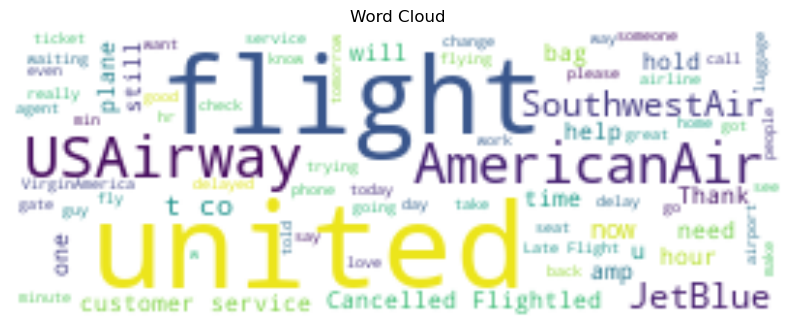

In [95]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [100]:
from PIL import Image
texts=' '.join(df['text'])

In [101]:
starlogo=stylecloud.gen_stylecloud(text=texts,
                                       icon_name='fas fa-star',size=756,
                                       palette='cartocolors.qualitative.Pastel_3',
                                       background_color='white',output_name='starstylecloud.png')
image=Image.open('starstylecloud.png')
image.show()

In [102]:
treelogo=stylecloud.gen_stylecloud(text=texts,
                                       icon_name='fas fa-tree',size=756,
                                       palette='cartocolors.qualitative.Pastel_3',
                                       background_color='white',output_name='treestylecloud.png')
image=Image.open('treestylecloud.png')
image.show()